<a href="https://colab.research.google.com/github/Jaehyung-Cho/yeardream/blob/main/Machine_Learning_Basics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning

> 머신러닝이란?

* Experience로 Task를 수행하여 Performance로 평가  
우리의 목표는 그런 Task를 찾는 것!  
x -f-> y로 보내주는 f를 x, y의 데이터로 찾기 : Kaggle은 Task(대회문제)를 얼마나 잘 수행했는가 Performance(채점 기준)

* 컴퓨터에게 학습이란?  
컴퓨터에게 데이터를 바라보는 방법(Model)과 예시(Data)를 주면 판단 내리는 기준(f)을 찾아가는 것

* 머신러닝의 목표  
Prediction for Unseen Data  
    1. Train data / Test data
    2. Overfitting
    3. Generalization

# Machine Learning Workflow

* Module 1 : 데이터 정의 & ML 문제 정의
* Module 2 : 데이터 정형화
* Module 3 : EDA
* Module 4 : Feature Engineering, 전처리
* Module 5 : ML modeling

-> Workflow를 마친 후 평가를 한 뒤에 빠른 피드백 및 수정을 하는 것이 중요

# Machine Learning Model : Regression

> Regression Analysis

* Estimating relationships between  
    * dependent variable(y, scalar / real value, target value 우리가 관심있는 값)
    * one or more independent variables(X, m-dimensional vector / feature vector)  
X -f-> y

## Types of Regression

1. Linear Regression  
$X = (x1, ..., xm)$에 대해  
$f : y = w_1x_1 + .. + w_mx_m + c$ 으로 나타내어지는 경우 ($w_i$ = weight, $c$ = constant, 상수항이 있어야 자유도가 증가함)
* MSE (Mean Squared Error)  
$L = \frac{\sum_{i}^n (y_i-y_î)^2}{N}$ : Loss Function

    이 경우 L은 $w_i$의 2차 함수이기 때문에 극소($\tilde{w_i}$)를 찾을 수 있음

* Ideal case  
    $P_{train}$, $P_{test}$ 고루 좋은 경우
    $P_{train}$은 좋지만 $P_{test}$는 나쁜 경우 Overfitting -> 학습에 규제를 추가 ex) Lasso, Ridge model

2. LightGBM Regressor (Gradient Boosting Model)  
대용량 데이터에 대해 빠르고, 성능 좋은 모델  
여러 Decision tree 중 target value를 잘 찾는 tree만 찾아서 해당 방향으로 확장하는 모델  
* 실전 데이터 분석에서 가장 많이 사용함
* Hyper-parameter(학습 모델)에 영향을 많이 받아 parameter tuning이 중요  
추후 오픈소스 라이브러리(ex. optuna)에 맡길 예정, AutoML
* Decision Tree(CART) -> Random Forest -> GBM -> XGBoost -> **LightGBM** -> **CatBoost**

> 회귀모델의 평가

* **예측 성능**을 기준으로 함  
정량적 기준을 설정하고, 달성할 때 까지 모델을 학습시킴

1. MSE
2. RMSLE (Root Mean Squared Log Error)  
$√\frac{\sum_{i}^n (log(y_i)-log(y_î))^2}{N}$  
    * $y_i$, $y_î$ 영향을 안 받음  
    * Outlier robustness
3. MAE (Mean Absolute Error)  
$\frac{\sum_{i}^n |y_i-y_î|}{N}$
4. $R^2$ Score (Coefficient of Determination)  
$R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{MSE}{Variance} = 1 - \frac{\sum_{i}^n (y_i-\hat{y_i)}^2}{\sum_{i}^n (y_i-\bar{y_i)}^2}$  
MSE와 Variance의 비 = 최적의 regression과 최악의 regression(평균)간의 비율  
P.S. Variance  
$\frac{\sum_{i}^n (y_i-\bar{y_i)}^2}{N}$

# 실습 / Scikit Learn

## Data Loading

In [ ]:
# !pip install sklearn # scikit-learn, MOOC에 영상 올라와있으니 참고하면 좋습니다!
# Colab에는 설치되어있어 따로 설치하지 않아도 됨
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from sklearn.datasets import fetch_california_housing

X = fetch_california_housing(as_frame = True).data # as_frame = True 설정 시 df로 자료를 받아옴, X를 가져옴(Data)

In [ ]:
y = fetch_california_housing(as_frame = True).target # y를 가져옴 (target)
fetch_california_housing(as_frame = True).frame # X, y 모두 가져옴

print(X.shape, y.shape)

(20640, 8) (20640,)


## Data Processing / EDA

In [ ]:
# 결측치 및 dtype 확인
X.info()
# X[X.isnull().any(axis = 1)] # 결측치가 하나라도 있는 자료를 불러오기

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


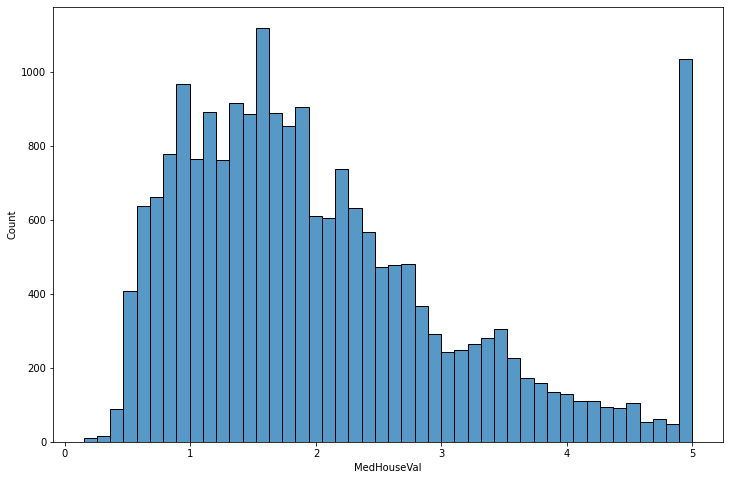

In [ ]:
# Distribution 확인
plt.figure(figsize = (12, 8))
sns.histplot(y)
plt.show()
# 5 이상의 값들은 clamping되어 5 값을 가지는 친구들이 많음

## 본격적인 Training 시작!

> Train, Test dataset 분리

In [ ]:
# Train-test split
from sklearn.model_selection import train_test_split

# train_test_split()의 반환값은 트테트테**
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42) # 순서가 트레이닝에 영향을 미칠 수 있기 때문, 아무 숫자나 쓰셈, state 고정되면 set도 고정됨
X_train
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


> Training

In [ ]:
# Training (Fitting)
# 1. 사용할 함수 설정
from sklearn.linear_model import LinearRegression
from lightgbm.sklearn import LGBMRegressor

# 2. 사용할 함수의 객체 생성
reg = LinearRegression()
reg2 = LGBMRegressor()

# 3. 학습
reg.fit(X_train, y_train) # Regression은 Supervised learning이므로 y 넣는거 잊지 말자!
reg2.fit(X_train, y_train)

LGBMRegressor()

> Evaluation

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

pred = reg.predict(X_train) # y_hat을 반환
print('Linear Regression')
print('MSE : %.4f' % mean_squared_error(y_train, pred)) # 보통 실제값, 예측값 순서로 입력
print('R2 : %.4f' % r2_score(y_train, pred))

pred2 = reg2.predict(X_train) # y_hat을 반환
print('LightGBM')
print('MSE : %.4f' % mean_squared_error(y_train, pred2)) # 보통 실제값, 예측값 순서로 입력
print('R2 : %.4f' % r2_score(y_train, pred2))

Linear Regression
MSE : 0.5179
R2 : 0.6126
LightGBM
MSE : 0.1562
R2 : 0.8831


> Prediction

In [ ]:
result = reg.predict(X_test)
print('Linear Regression')
print('MSE : %.4f' % mean_squared_error(y_test, result)) # 보통 실제값, 예측값 순서로 입력
print('R2 : %.4f' % r2_score(y_test, result))

pred2 = reg2.predict(X_test) # y_hat을 반환
print('LightGBM')
print('MSE : %.4f' % mean_squared_error(y_test, pred2)) # 보통 실제값, 예측값 순서로 입력
print('R2 : %.4f' % r2_score(y_test, pred2))

Linear Regression
MSE : 0.5559
R2 : 0.5758
LightGBM
MSE : 0.2148
R2 : 0.8360


## Boston

In [ ]:
from sklearn.dataset import load_boston

X, y = load_boston(X_y = True)
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.2, random_state = 42)

model = LinearRegresssion()
model.fit(train_X, train_y)

predicted = model.predict(test_X)

# 지도학습 / 비지도학습

## 프로세스

1. 문제 정의
2. 데이터 수집
3. 데이터 탐색
4. 데이터 전처리
5. 모델링
6. 모델평가 -> 2로 돌아가서 개선 (2~6 반복)
7. 결과보고서 작성

## 학습의 종류

> 데이터에 따라 적절한 model 사용 필요  
ML 사용할 필요가 없는 경우파악도 필요 (통계 모델, EDA, A/B test 등)

* 지도학습  
    y값이 존재함
    * 예측 (Regression) : 종속변수가 연속형

* 비지도학습  
    y값이 존재 X, 일상생활에서 더 자주 마주함
    * 군집화 (Clustering) : 종속변수가 범주형
    * Dimensionality Reduction : X의 중요 정보 추출
    * 연관규칙분석 (Association Rule Analysis) : 종속변수가 스코어 or 샘플

* 준지도학습  
    * 종속 변수가 label이 있는 것도, 없는 것도 존재
    * 군집화, 지도학습을 순차적으로 적용

* 강화 학습
    행동의 대상(Agent)과 환경(Environment) 사이의 상호작용을 통해 목표 최대화 하는 방법(Reward Maximization)
    * Real-time decisions : Reaction 하면서 최적화가 필요한 방법
    * Game AI

P.S. self-supervised learning  
* 모델이 학습하면서 레이블을 직접 만듬

## Data Split

> Train-Test Split

* 목표 : 족보에 안 나온 실제 기말에서 100점 맞기 (**Prediction for Unseen** data)
1. 8년치 공부 및 오답 후 2년치 시험 전날에 풀기  
Train - Test
2. 6년치 공부 및 오답 후 2년치로 점수 확인, 2년치 시험 전날에 풀기  
Train - Validation - Test


## Training

*  Training  
반복할수록 성능의 개선이 있어야 함 (학습 O)  
Parameter의 결정

* Inference  
학습된 모델과 test data 필요  
Paramter 결정 X  
모델의 평가가 이루어짐

## Feature Engineering